In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales=pd.read_csv('SalesData.csv')

In [3]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


##### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [6]:
region_sales=sales.groupby('Region')[['Sales2015','Sales2016']].sum()
region_sales

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


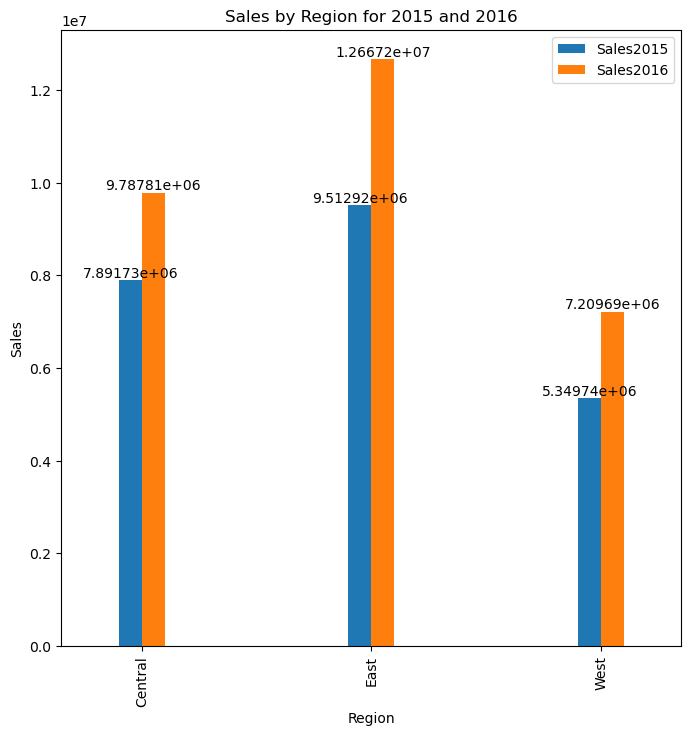

In [19]:
ax = region_sales.plot(kind='bar',figsize=(8,8),width=0.2)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.ylabel('Sales')
plt.title('Sales by Region for 2015 and 2016')
plt.show()

##### 

##### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [22]:
sales_pie = sales.groupby('Region')['Sales2016'].sum()
sales_pie

Region
Central    9.787809e+06
East       1.266723e+07
West       7.209689e+06
Name: Sales2016, dtype: float64

<Axes: ylabel='Sales2016'>

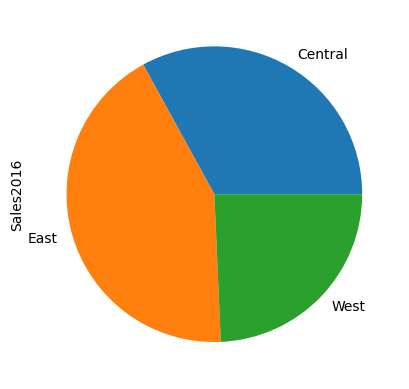

In [23]:
sales_pie.plot(kind='pie')

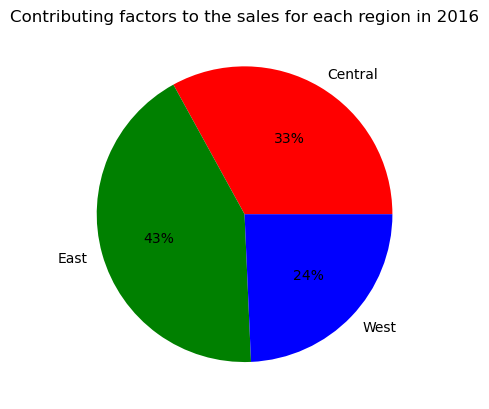

In [24]:
plt.pie(sales_pie,autopct='%1.0f%%',labels=['Central','East','West'],colors=['r','g','b'])
plt.title("Contributing factors to the sales for each region in 2016")

# Display the pie chart
plt.show()

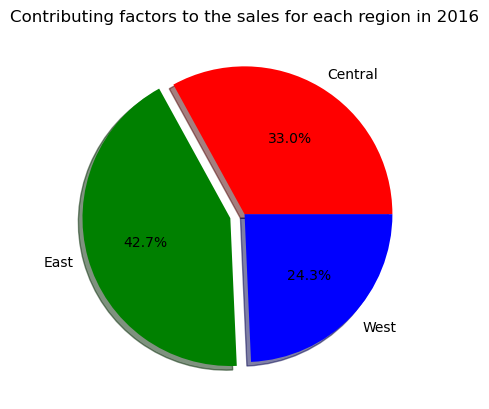

In [29]:
plt.pie(sales_pie,autopct='%1.1f%%',labels=['Central','East','West'],shadow=True, explode=[0.0,0.1,0.0],colors=['r','g','b'])
plt.title("Contributing factors to the sales for each region in 2016")

# Display the pie chart
plt.show()

##### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [32]:
region_tier_sales = sales.groupby(['Region','Tier'])[['Sales2015','Sales2016']].sum()
region_tier_sales

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

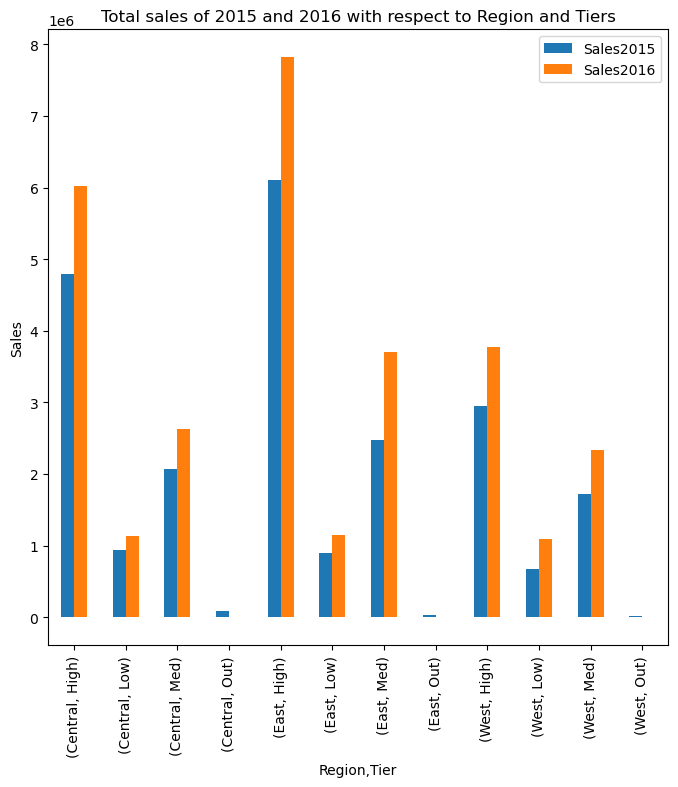

In [35]:
region_tier_sales.plot(kind='bar',figsize=(8,8))
plt.ylabel('Sales')
plt.title('Total sales of 2015 and 2016 with respect to Region and Tiers')
plt.show()

##### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [45]:
sales_state = sales.groupby(['Region','State'])[['Sales2015','Sales2016']].sum()
east_sales=sales_state.loc['East']

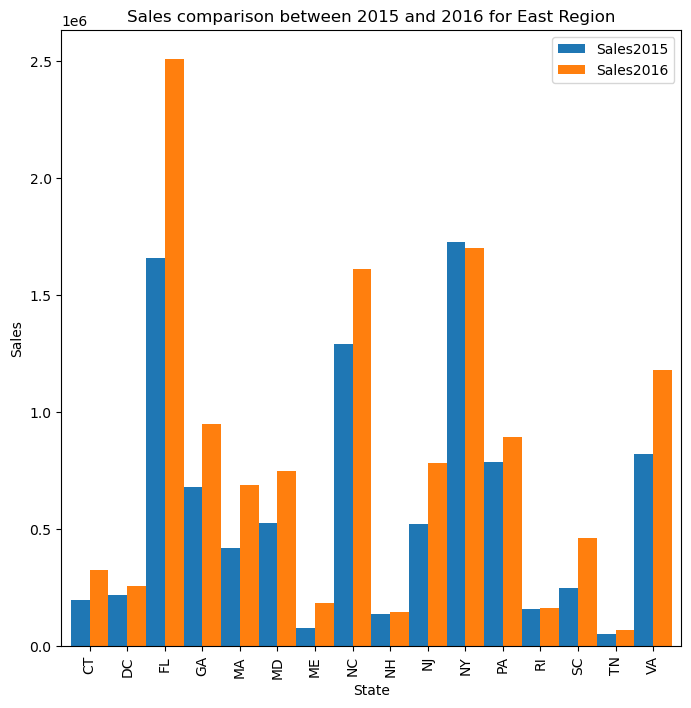

In [47]:
east_sales.plot(kind='bar',figsize=(8,8),width=1.0)
plt.ylabel('Sales')
plt.title('Sales comparison between 2015 and 2016 for East Region')
plt.show()


In [50]:
print('NY state registered a decline in 2016 as compared to 2015 in East Region')

NY state registered a decline in 2016 as compared to 2015 in East Region


##### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [57]:
tier_sales=sales.groupby(['Tier','Division'])[['Units2015','Units2016']].sum()
tier_sales

Units2015  Units2016
Tier Division                           
High BIG APPLE       180.8330   231.0000
     CHARGERS        123.6666   164.4999
     CONGRESSIONAL   164.5003   205.0000
     DIAMONDBACK     153.3334   176.6667
     EMPIRE          414.3332   449.3332
...                       ...        ...
Out  SYNERGY           3.0000     0.0000
     THE CAROLINAS     2.0000     0.0000
     VICTORY           1.0000     0.0000
     WOLVERINE         1.0000     0.0000
     WRANGLER         13.0000     0.0000

[96 rows x 2 columns]

In [58]:
high_tier_sales=tier_sales.loc['High']
high_tier_sales

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


Text(0.5, 1.0, 'Comparison of Units sold between 2015 and 2016 in High tier')

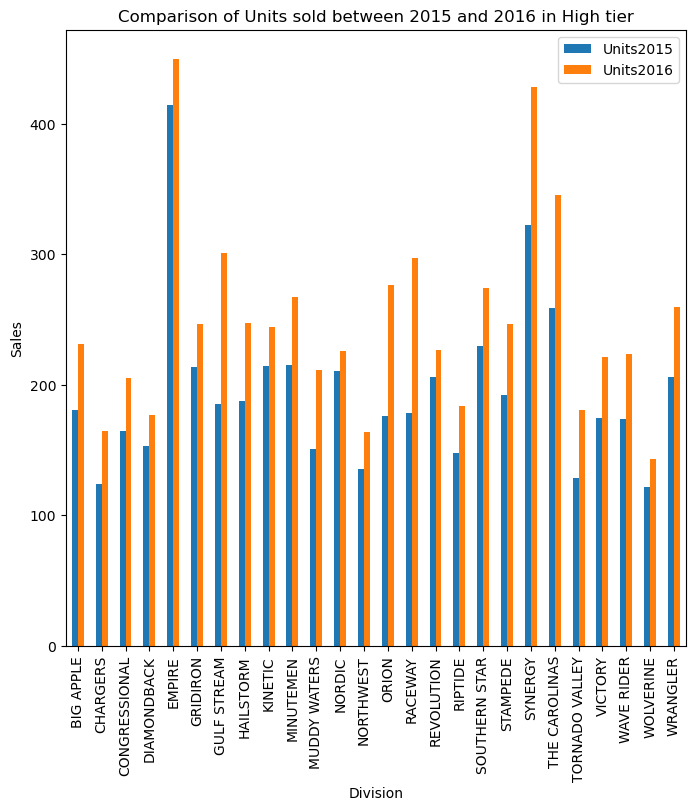

In [59]:
high_tier_sales.plot(kind='bar',figsize=(8,8))
plt.ylabel('Sales')
plt.title('Comparison of Units sold between 2015 and 2016 in High tier')


In [60]:
print("No division show decline in number of units sold in 2016 compared to 2015")

No division show decline in number of units sold in 2016 compared to 2015


##### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
• Jan - Mar : Q1
• Apr - Jun : Q2
• Jul - Sep : Q3
• Oct - Dec : Q4

In [62]:
month=sales['Month']
month

0       Aug
1       Oct
2       Jun
3       Mar
4       Sep
       ... 
3704    Feb
3705    Aug
3706    Nov
3707    Jan
3708    Jun
Name: Month, Length: 3709, dtype: object

In [63]:
quarter=[]
for x in month:
    if x in['Jan','Feb','Mar']:
        quarter.append("Q1")
    elif x in['Apr','May','Jun']:
        quarter.append("Q2")
    elif x in['Jul','Aug','Sep']:
        quarter.append("Q3")
    else:
        quarter.append("Q4")

In [64]:
quarter

['Q3',
 'Q4',
 'Q2',
 'Q1',
 'Q3',
 'Q3',
 'Q1',
 'Q1',
 'Q1',
 'Q3',
 'Q1',
 'Q1',
 'Q3',
 'Q1',
 'Q3',
 'Q4',
 'Q2',
 'Q4',
 'Q2',
 'Q2',
 'Q4',
 'Q2',
 'Q2',
 'Q2',
 'Q4',
 'Q4',
 'Q1',
 'Q2',
 'Q3',
 'Q1',
 'Q1',
 'Q1',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q2',
 'Q4',
 'Q1',
 'Q4',
 'Q4',
 'Q4',
 'Q1',
 'Q1',
 'Q2',
 'Q2',
 'Q2',
 'Q1',
 'Q4',
 'Q3',
 'Q4',
 'Q1',
 'Q1',
 'Q3',
 'Q2',
 'Q3',
 'Q1',
 'Q2',
 'Q3',
 'Q3',
 'Q4',
 'Q3',
 'Q1',
 'Q4',
 'Q4',
 'Q3',
 'Q1',
 'Q3',
 'Q4',
 'Q1',
 'Q3',
 'Q1',
 'Q3',
 'Q2',
 'Q1',
 'Q3',
 'Q3',
 'Q2',
 'Q4',
 'Q1',
 'Q2',
 'Q4',
 'Q2',
 'Q3',
 'Q2',
 'Q2',
 'Q4',
 'Q3',
 'Q4',
 'Q3',
 'Q2',
 'Q3',
 'Q1',
 'Q3',
 'Q4',
 'Q4',
 'Q2',
 'Q3',
 'Q2',
 'Q4',
 'Q1',
 'Q1',
 'Q4',
 'Q1',
 'Q2',
 'Q1',
 'Q2',
 'Q4',
 'Q4',
 'Q3',
 'Q1',
 'Q1',
 'Q1',
 'Q3',
 'Q3',
 'Q2',
 'Q4',
 'Q3',
 'Q2',
 'Q1',
 'Q4',
 'Q2',
 'Q4',
 'Q1',
 'Q3',
 'Q3',
 'Q3',
 'Q4',
 'Q4',
 'Q4',
 'Q2',
 'Q1',
 'Q4',
 'Q1',
 'Q3',
 'Q3',
 'Q1',
 'Q4',
 'Q3',
 'Q2',
 'Q1',
 'Q1',
 'Q2',

In [65]:
sales['quarter']=pd.Series(quarter)

In [66]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,quarter
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


##### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [69]:
qtr_sales=sales.groupby('quarter')[['Sales2015','Sales2016']].sum()
qtr_sales

,Sales2015,Sales2016
quarter,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


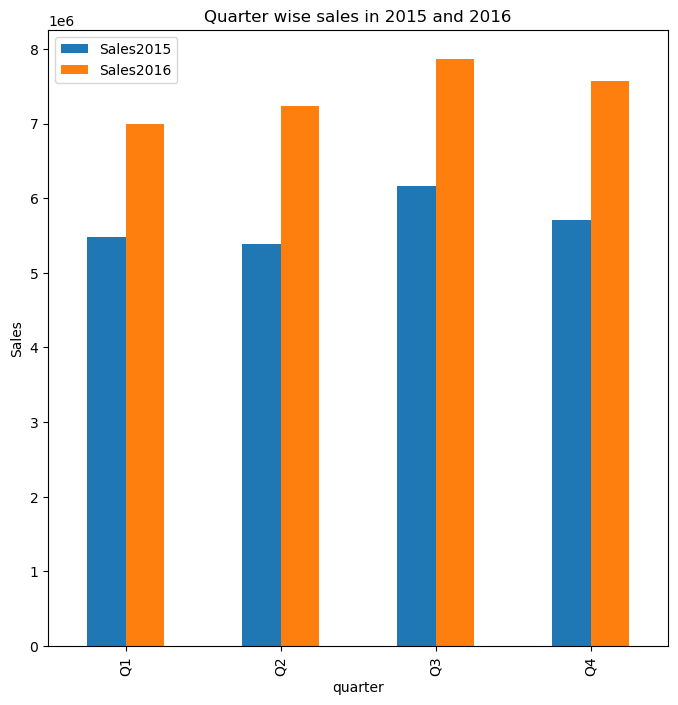

In [73]:
qtr_sales.plot(kind='bar',figsize=(8,8))
plt.ylabel('Sales')
plt.title('Quarter wise sales in 2015 and 2016')
plt.show()

##### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
(Draw 4 pie charts representing a Quarter for each Tier)

In [74]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,quarter
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


In [78]:
qtr_pivot=pd.pivot_table(data=sales, index='quarter', columns='Tier', values='Sales2016')
qtr_pivot

Tier,High,Low,Med,Out
quarter,,,,
Q1,7974.677515,5516.469593,7654.041681,0.000000
Q2,8752.018136,5031.608757,8758.157542,0.000000
Q3,9334.404693,5446.422671,8197.976091,-360.947778
Q4,9386.142545,5052.104694,8307.596804,0.000000


In [83]:
q1=qtr_pivot.loc['Q1']

([<matplotlib.patches.Wedge at 0x242a6993950>,
 [Text(0.4141128477235908, 1.019073377804689, 'High'),
  Text(-1.0987520998219134, -0.05238151522184273, 'Low'),
  Text(0.46217078713399196, -0.9981974571796637, 'Med'),
  Text(1.0999999999999808, -2.0597886570014373e-07, 'Out')],
 [Text(0.22587973512195858, 0.5558582060752848, '38%'),
  Text(-0.5993193271755891, -0.028571735575550577, '26%'),
  Text(0.25209315661854104, -0.5444713402798165, '36%'),
  Text(0.5999999999999894, -1.1235210856371475e-07, '0%')])

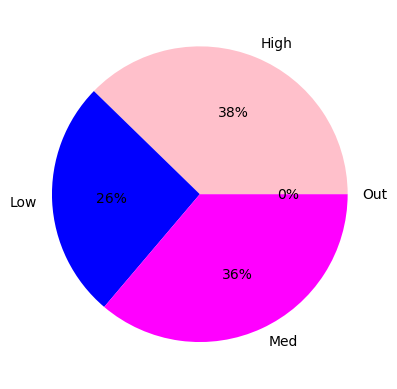

In [85]:
plt.pie(q1, autopct='%1.0f%%',labels=["High","Low","Med","Out"],colors=['pink','blue','magenta'])

In [87]:
q2=qtr_pivot.loc['Q2']

([<matplotlib.patches.Wedge at 0x242a6488490>,
 [Text(0.3782715486635362, 1.0329136631256701, 'High'),
  Text(-1.0999995973641348, 0.0009411688166311252, 'Low'),
  Text(0.3773875926254073, -1.033236954881309, 'Med'),
  Text(1.0999999999999954, -1.0298943298478347e-07, 'Out')],
 [Text(0.20632993563465607, 0.5634074526140018, '39%'),
  Text(-0.5999997803804371, 0.0005133648090715228, '22%'),
  Text(0.20584777779567667, -0.5635837935716229, '39%'),
  Text(0.5999999999999974, -5.617605435533643e-08, '0%')])

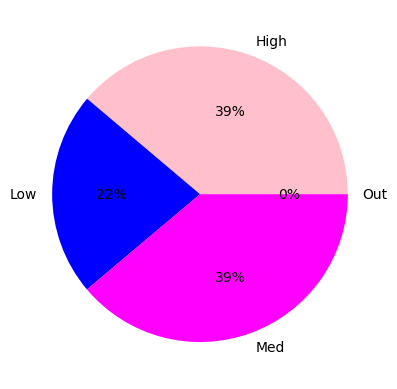

In [88]:
plt.pie(q2, autopct='%1.0f%%',labels=["High","Low","Med","Out"],colors=['pink','blue','magenta'])

In [93]:
q3=qtr_pivot.loc['Q3']
# Transform negative values to positive (absolute values)
q3_abs = np.abs(q3)

([<matplotlib.patches.Wedge at 0x242a6b05a10>,
 [Text(0.3401294530783813, 1.0460936646154595, 'High'),
  Text(-1.0940129127902105, -0.11461128499532353, 'Low'),
  Text(0.39793859571300805, -1.0254973788566986, 'Med'),
  Text(1.0987019907761464, -0.05342223754704598, 'Out')],
 [Text(0.18552515622457164, 0.5705965443357051, '40%'),
  Text(-0.5967343160673875, -0.06251524636108556, '23%'),
  Text(0.21705741584345892, -0.5593622066491083, '35%'),
  Text(0.599291994968807, -0.029139402298388715, '2%')])

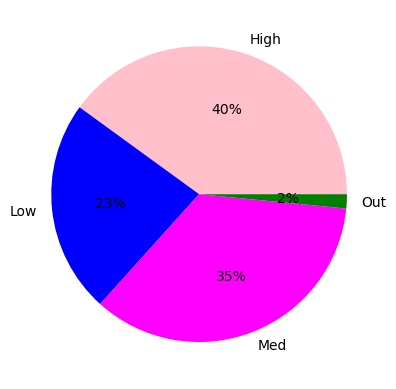

In [94]:
plt.pie(q3_abs, autopct='%1.0f%%',labels=["High","Low","Med","Out"],colors=['pink','blue','magenta','green'])

In [95]:
q4=qtr_pivot.loc['Q4']

([<matplotlib.patches.Wedge at 0x242a6b8fdd0>,
 [Text(0.29807528675681094, 1.0588442394539648, 'High'),
  Text(-1.0878176097912529, -0.163256999323293, 'Low'),
  Text(0.45192298114694995, -1.0028786661960924, 'Med'),
  Text(1.1, -2.6942229581241775e-16, 'Out')],
 [Text(0.16258652004916957, 0.5775514033385262, '41%'),
  Text(-0.5933550598861379, -0.0890492723581598, '22%'),
  Text(0.24650344426197268, -0.5470247270160504, '37%'),
  Text(0.6, -1.4695761589768238e-16, '0%')])

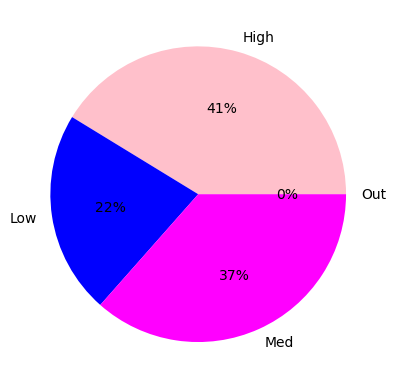

In [96]:
plt.pie(q4, autopct='%1.0f%%',labels=["High","Low","Med","Out"],colors=['pink','blue','magenta','green'])